### Importing the necessary modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### Printing the Data

In [2]:
df = pd.read_csv("fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Replacing string label to numercal as Fake = 0 and Real = 1

In [3]:
df = df.replace({"FAKE":0,"REAL":1})
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


### Tokenisation : Removing stop words and irrelevant characters

In [4]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

def clean_data(text):
    text = text.lower() 
    text = re.sub('[^a-zA-Z]' , ' ' , text)
    token = text.split() 
    token = [lemmatizer.lemmatize(word) for word in token if not word in stopwords]  
    clean_news = ' '.join(token) 
    
    return clean_news 
df['title'] = df['title'].apply(lambda x : clean_data(x))

df.head()

,Unnamed: 0,title,text,label
0,8476,smell hillary fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,watch exact moment paul ryan committed politic...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,kerry go paris gesture sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,bernie supporter twitter erupt anger dnc tried...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,battle new york primary matter,It's primary day in New York and front-runners...,1


### Vectorisation : Changing String values into Computational Vector Equivalents

In [5]:
x_df = df['title']
y_df = df['label']

count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x_df)
freq_term_matrix = count_vectorizer.transform(x_df)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

### Train_Test_Split : Splitting the data into Train and Test data in 80:20 Ratio

In [1]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,y_df, test_size = 0.2, random_state=0)

NameError: name 'train_test_split' is not defined

### Accuracy : Create a dataframe for each of the model's accuracy and a function to update the dataframe

In [78]:
accuracy_df = pd.DataFrame(columns = ['Model', 'Accuracy', ' True Pos', 'False Pos', 'True Neg', 'False Neg'])
def update_accuracy(cm, acc, model):
    df = [1,2,3,4,5,6]
    FP = float(cm[0][1])
    TP = float(cm[1][1])
    FN = float(cm[1][0])
    TN = float(cm[0][0])
    TPR = (TP/(TP+FP))*100
    FPR = 100 - TPR
    TNR = (TN/(TN+FN))*100
    FNR = 100 - TNR
    df[0] = model
    df[1] = round(float(acc*100),1)
    df[2] = round(float(TPR),1)
    df[3] = round(float(FPR),1)
    df[4] = round(float(TNR),1)
    df[5] = round(float(FNR),1)
    return df

# Run the 4 ML Models : Print the Confusion Matrix & Accuracy

### Model (1) : Logistic Regression Model

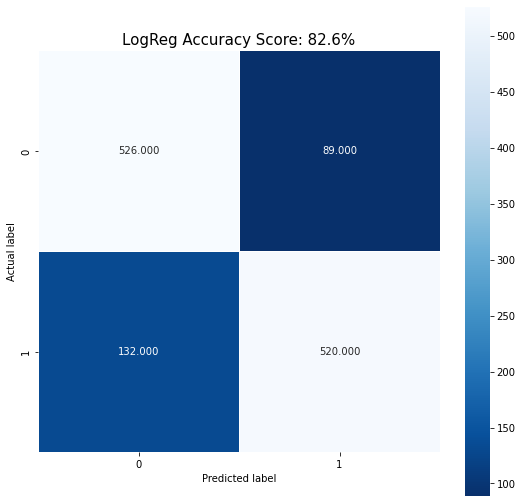

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

logreg_pred = logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test,logreg_pred)
logreg_cm = metrics.confusion_matrix(y_test, logreg_pred)

plt.figure(figsize=(9,9))
sns.heatmap(logreg_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'LogReg Accuracy Score: {0:.1f}%'.format(logreg_accuracy*100)
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(logreg_cm, logreg_accuracy, "Log Reg")
accuracy_df.loc[len(accuracy_df)] = accuracy_list

### Model (2) : Naive-Bayes Prediction Model

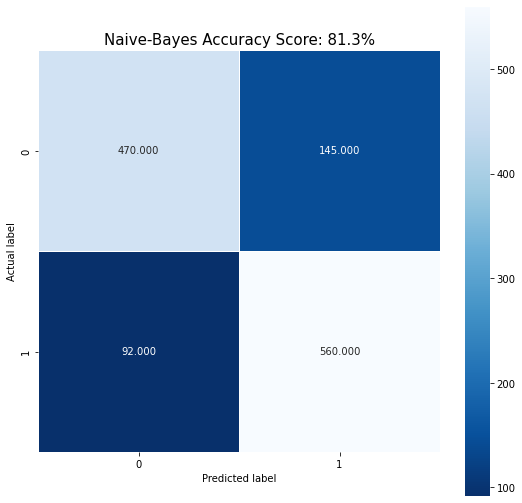

In [80]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)

nb_pred = NB.predict(x_test)
nb_accuracy = accuracy_score(y_test,nb_pred)
nb_cm = metrics.confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(9,9))
sns.heatmap(nb_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Naive-Bayes Accuracy Score: {0:.1f}%'.format(nb_accuracy*100)
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(nb_cm, nb_accuracy, "Naive-Bayes")
accuracy_df.loc[len(accuracy_df)] = accuracy_list

### Model (3) : Decision Tree Classifier Model

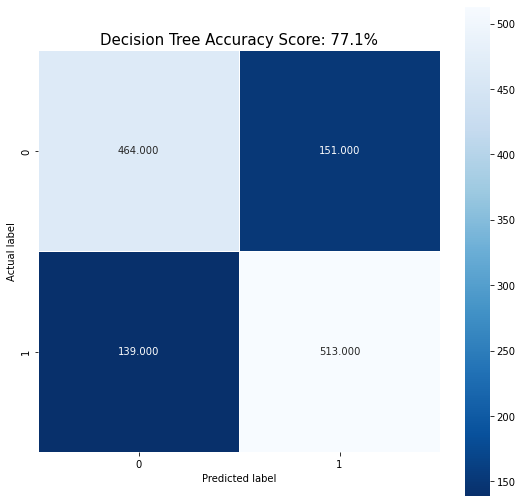

In [81]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

tree_pred = clf.predict(x_test)
tree_accuracy = accuracy_score(y_test,tree_pred)
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

plt.figure(figsize=(9,9))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Decision Tree Accuracy Score: {0:.1f}%'.format(tree_accuracy*100)
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(tree_cm, tree_accuracy, "Decision Tree")
accuracy_df.loc[len(accuracy_df)] = accuracy_list

### Model (4) : Passive-Aggressive Classifier Model

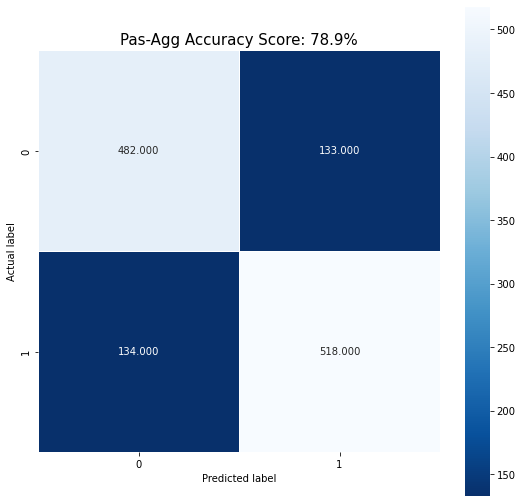

In [82]:
from sklearn.linear_model import PassiveAggressiveClassifier
pag = PassiveAggressiveClassifier(max_iter=50)
pag.fit(x_train,y_train)

pag_pred = pag.predict(x_test)
pag_accuracy = accuracy_score(y_test,pag_pred)
pag_cm = metrics.confusion_matrix(y_test, pag_pred)

plt.figure(figsize=(9,9))
sns.heatmap(pag_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Pas-Agg Accuracy Score: {0:.1f}%'.format(float(pag_accuracy*100))
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(pag_cm, pag_accuracy, "Pas-Agg")
accuracy_df.loc[len(accuracy_df)] = accuracy_list

### Model (5) : Support Vector Machine Classifier Model

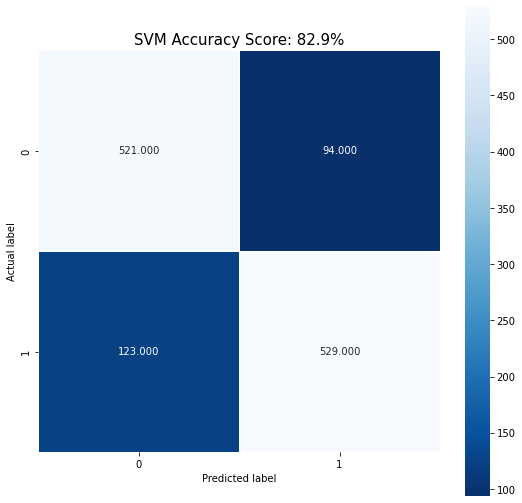

In [83]:
from sklearn import svm
svmclf = svm.SVC(kernel='linear')
svmclf.fit(x_train,y_train)

svm_pred = svmclf.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_pred)
svm_cm = metrics.confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(9,9))
sns.heatmap(svm_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'SVM Accuracy Score: {0:.1f}%'.format(float(svm_accuracy*100))
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(svm_cm, svm_accuracy, "SVM")
accuracy_df.loc[len(accuracy_df)] = accuracy_list

### Model (6) : Ensemble

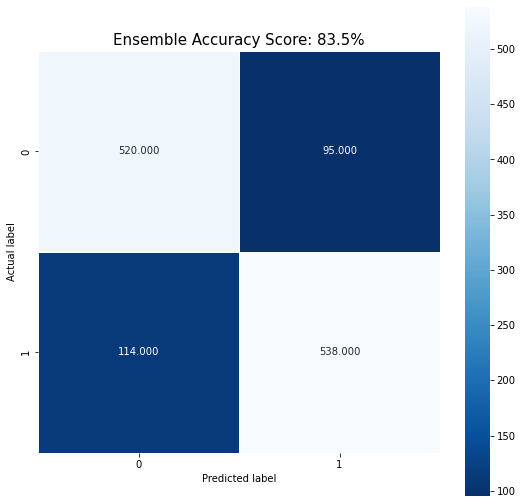

In [84]:
ensemble_pred = [None] * len(pag_pred)

for i in range(0,len(pag_pred)):
    total = logreg_pred[i] + nb_pred[i] + tree_pred[i] + pag_pred[i] + svm_pred[i]
    if total >= 3:
        ensemble_pred[i] = 1
    else:
        ensemble_pred[i] = 0

ensemble_pred = np.array(ensemble_pred)
ensemble_accuracy = accuracy_score(y_test,ensemble_pred)
ensemble_cm = metrics.confusion_matrix(y_test, ensemble_pred)

plt.figure(figsize=(9,9))
sns.heatmap(ensemble_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Ensemble Accuracy Score: {0:.1f}%'.format(float(ensemble_accuracy*100))
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(ensemble_cm, ensemble_accuracy, "Ensemble")
accuracy_df.loc[len(accuracy_df)] = accuracy_list

### Assessing Accuracy : Print the Accuracy values of each of the 4 models in a dataframe 

In [85]:
accuracy_df

,Model,Accuracy,True Pos,False Pos,True Neg,False Neg
0,Log Reg,82.6,85.4,14.6,79.9,20.1
1,Naive-Bayes,81.3,79.4,20.6,83.6,16.4
2,Decision Tree,77.1,77.3,22.7,76.9,23.1
3,Pas-Agg,78.9,79.6,20.4,78.2,21.8
4,SVM,82.9,84.9,15.1,80.9,19.1
5,Ensemble,83.5,85.0,15.0,82.0,18.0
